In [17]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.nan)
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
%pylab inline
exec(open("/Users/raghuramkowdeed/Documents/afp/get_signal_names.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/portfolio_optimizer.py").read())
exec(open("/Users/raghuramkowdeed/Documents/afp/non_linear_signal.py").read())
import datetime


Populating the interactive namespace from numpy and matplotlib


In [2]:
sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'

In [3]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)

for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    #print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    this_df = ( this_df - this_df.mean() ) / this_df.std()
    sig_df = sig_df.append(this_df)

In [4]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

In [5]:
sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]

In [6]:
sig_name = 'sfe'
this_sig_sr = sig_df[sig_name]

In [7]:

pm = PortfolioOptimizer(fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/',
                        fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv',
                        fac_cov_hl = 12.0,
                        fac_names = ['beta']
                       )



--------


In [8]:
this_sig_sr = pm.neu_signal(this_sig_sr)

In [9]:
pnl_sr_1 = pm.run_signal(sig_sr=this_sig_sr,neu_sig=False)
pnl_sr_2 = pm.run_signal(sig_sr=this_sig_sr,neu_sig=True)

-1.5190940963153108

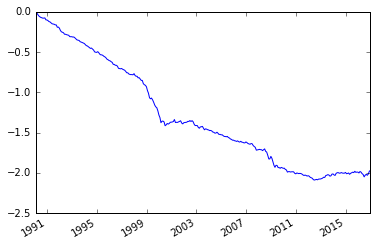

In [10]:
pnl_sr_1.cumsum().plot()
pnl_sr_1.mean()*np.sqrt(12)/pnl_sr_1.std()

-1.5637749821690476

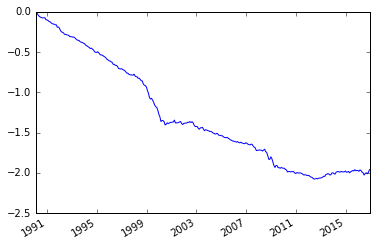

In [11]:
pnl_sr_2.cumsum().plot()
pnl_sr_2.mean()*np.sqrt(12)/pnl_sr_2.std()

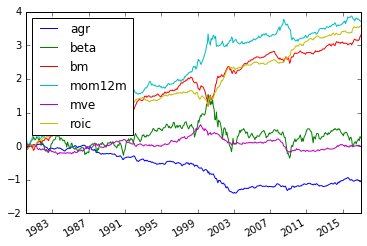

In [12]:
pm.fac_ret.cumsum().plot()

In [13]:
corr_df = pd.read_csv('/Users/raghuramkowdeed/Desktop/knn_sharpe.csv')

In [26]:
#corr_df.sort_values(['knn'],ascending=False,)

In [27]:
sig_name = 'sfe'
look_back = 12
this_sig_sr = sig_df[sig_name]
this_ret_sr = sig_df['ret']



In [28]:
l_sig_sr = get_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr, look_back=look_back)
nl_knn_sig_sr = get_knn_non_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr, look_back=look_back)
#nl_kernel_sig_sr = get_kernel_non_linear_sig(sig_sr=this_sig_sr, ret_sr=this_ret_sr,look_back=look_back, gamma= 0.5)
print('------')

------


In [29]:
pnl_sr_l= pm.run_signal(sig_sr=l_sig_sr,neu_sig=True)
pnl_sr_knn = pm.run_signal(sig_sr=nl_knn_sig_sr,neu_sig=True)
#pnl_sr_kernel = pm.run_signal(sig_sr=nl_kernel_sig_sr,neu_sig=True)

In [30]:
plot_df = pd.DataFrame()
plot_df['lm'] = pnl_sr_l
plot_df['knn'] = pnl_sr_knn
#plot_df['kernel'] = pnl_sr_kernel

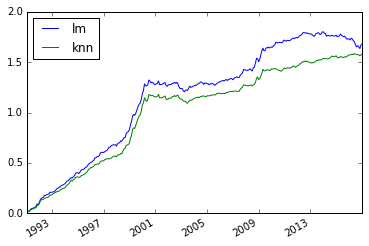

In [31]:
plot_df.cumsum().plot()

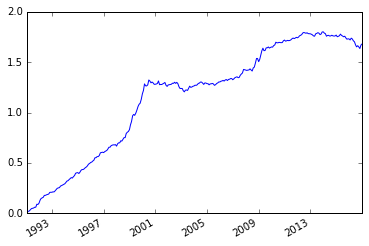

In [32]:
plot_df['lm'].cumsum().plot()

In [33]:
plot_df.mean(axis=0)*sqrt(12)/plot_df.std()

lm     1.301061
knn    1.490155
dtype: float64